In [69]:
%pylab inline
import os
import seaborn as sns
import ipywidgets as widgets
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


## Datensatz: Cropped Yale Face Dataset B

* 5760 Bilder von 10 Personen
* Jeweils 576 verschiedene Aufnahmebedingunen:
  * 9 Posen
  * 64 Beleuchtungsrichtungen
* 192x168 Pixel Graustufenbilder
* Gesichter normalisiert und ausgeschnitten

In [12]:
images = [imread(os.path.join(path,f))
          for path,_,files in os.walk("{}/Forschung/Datasets/CroppedYale".format(os.getenv("HOME")))
          for f in files if f.endswith("pgm") and "Ambient" not in f]

In [62]:
imgshape = images[0].shape
imgshape

(192, 168)

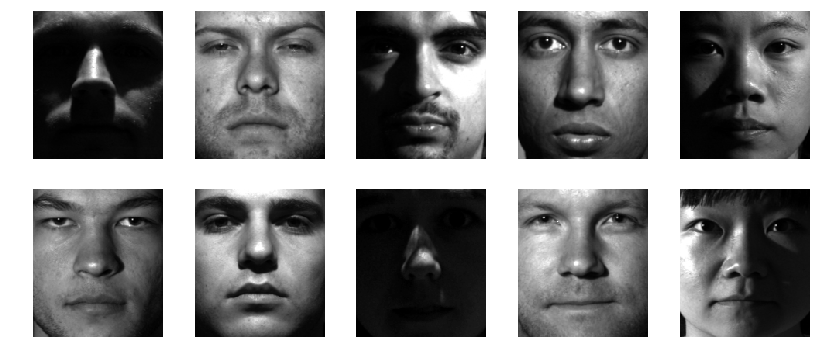

In [48]:
figure(figsize=(14,6))
gray()
for i,k in enumerate(random.choice(arange(len(images)), 10)):
    subplot(2,5,i+1)
    imshow(images[k])
    axis("off")

## Eigenfaces

In [52]:
# Bilder als Vektoren abrollen
X = array(images).reshape(len(images), -1)

In [53]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=50).fit(X)

### Mittleres Gesicht

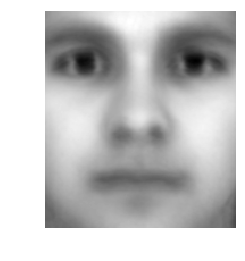

In [146]:
gray()
imshow(pca.mean_.reshape(imgshape))
axis('off');

### 20 erste Hauptrichtungen

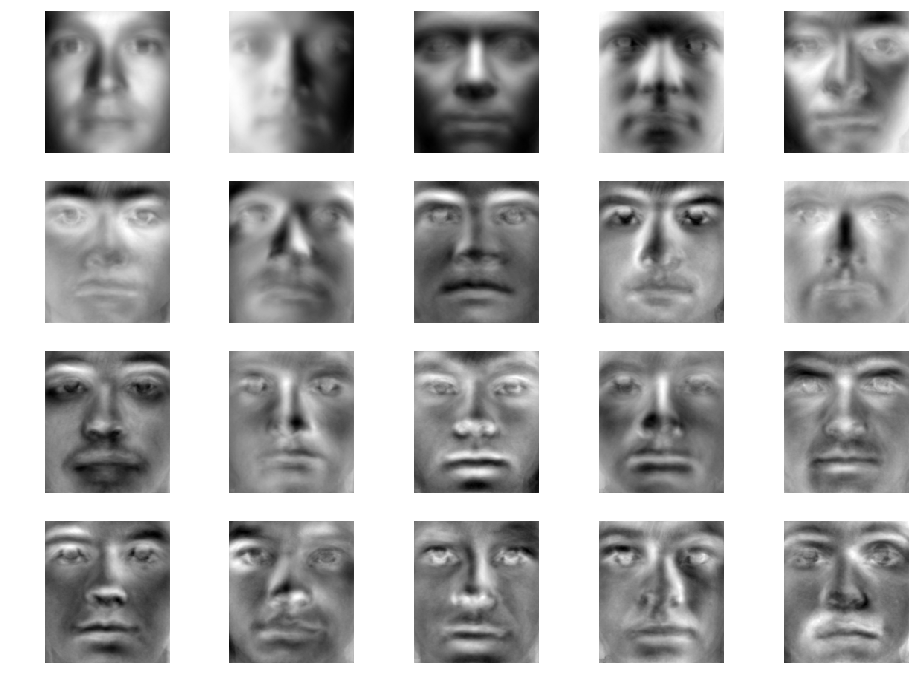

In [147]:
figure(figsize=(16,12))
for i,img in enumerate(pca.components_[:20]):
    subplot(4,5,i+1)
    imshow(img.reshape(imgshape))
    axis('off')

### Sichtung

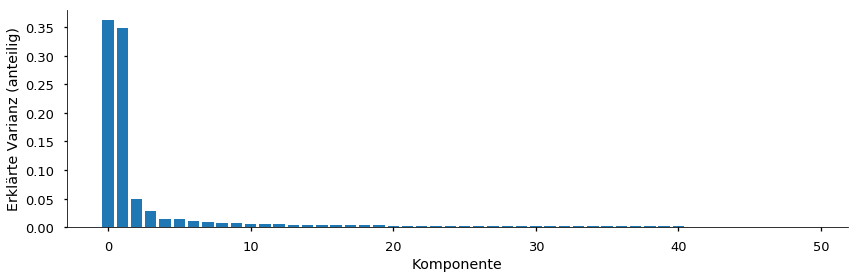

In [148]:
figure(figsize=(14,4))
bar(arange(pca.n_components_), pca.explained_variance_ratio_)
sns.despine()
xlabel("Komponente")
ylabel("Erklärte Varianz (anteilig)");

In [171]:
pX = pca.transform(X)

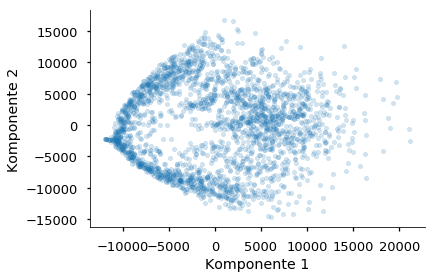

In [172]:
scatter(pX[:,0], pX[:,1], alpha=.2, s=20)
sns.despine()
xlabel("Komponente 1")
ylabel("Komponente 2");

In [183]:
def faceDetails(k):
    figure(figsize=(16,4))
    subplot(131)
    title("Original")
    imshow(images[k])
    axis('off')

    subplot(132)
    bar(arange(pca.n_components_), pX[k])
    axhline(0, color='black', lw=1)
    title("Merkmalsvektor")
    sns.despine()
    xlabel("Komponente")
    ylabel("Loading")

    subplot(133)
    imshow(pca.inverse_transform(pX[k]).reshape(imgshape))
    title("Rekonstruktion")
    axis('off')

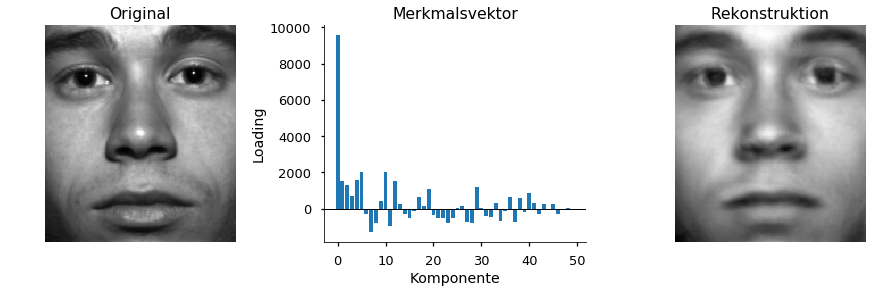

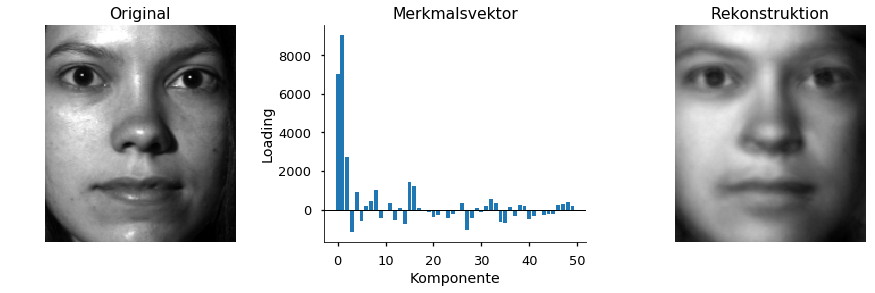

In [184]:
faceDetails(1)
faceDetails(98)

### Synthese

In [168]:
rnge = (-5000,5000,1)
@widgets.interact(
    f01 = rnge, f02 = rnge, f03 = rnge, f04 = rnge, f05 = rnge,
    f06 = rnge, f07 = rnge, f08 = rnge, f09 = rnge, f10 = rnge)
def synth(f01=0, f02=0, f03=0, f04=0, f05=0, f06=0, f07=0, f08=0, f09=0, f10=0):
    figure()
    x = zeros_like(pX[0])
    x[:10] = [f01, f02, f03, f04, f05, f06, f07, f08, f09, f10]
    imshow(pca.inverse_transform(x).reshape(imgshape))
    axis("off")
    show()